In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the Excel files from the drive
df_30 = pd.read_json('/content/drive/MyDrive/Data Folder/Lon-Ho/demand_london_30d-60d_lagged.json')
# df_60 = pd.read_json('/content/drive/MyDrive/Data Folder/Lon-Ho/demand_london_60d-90d_lagged.json')
df_90 = pd.read_json('/content/drive/MyDrive/Data Folder/Lon-Ho/demand_london_90d-120d__lagged.json')
df_30lag = pd.read_json('/content/drive/MyDrive/Data Folder/Lon-Ho/demand_london_next30d_lagged.json')
df = pd.read_json('/content/drive/MyDrive/Data Folder/TS-Hotel-London/all_events_london.json')

Mounted at /content/drive


In [3]:
df_30.columns

Index(['ds', 'y', 'demand_x', 'demand_xx', 'demand_xxx', 'demand_xxxx',
       'local_rank', 'attendance', 'attendance_concerts', 'attendance_expos',
       'attendance_conferences', 'attendance_performingarts',
       'attendance_community', 'attendance_sports', 'attendance_festivals'],
      dtype='object')

In [4]:
df_30.head()

,ds,y,demand_x,demand_xx,demand_xxx,demand_xxxx,local_rank,attendance,attendance_concerts,attendance_expos,attendance_conferences,attendance_performingarts,attendance_community,attendance_sports,attendance_festivals
0,2018-09-28,380,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-09-29,429,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-09-30,339,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,329,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-10-02,431,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ds                         1803 non-null   object
 1   y                          1803 non-null   int64 
 2   demand_x                   1803 non-null   int64 
 3   demand_xx                  1803 non-null   int64 
 4   demand_xxx                 1803 non-null   int64 
 5   demand_xxxx                1803 non-null   int64 
 6   local_rank                 1803 non-null   int64 
 7   attendance                 1803 non-null   int64 
 8   attendance_concerts        1803 non-null   int64 
 9   attendance_expos           1803 non-null   int64 
 10  attendance_conferences     1803 non-null   int64 
 11  attendance_performingarts  1803 non-null   int64 
 12  attendance_community       1803 non-null   int64 
 13  attendance_sports          1803 non-null   int64 
 14  attendan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   datastay                   1236 non-null   object 
 1   attendance_concerts        1235 non-null   float64
 2   attendance_expos           1236 non-null   int64  
 3   attendance_conferences     1236 non-null   int64  
 4   attendance_performingarts  1232 non-null   float64
 5   attendance_community       1236 non-null   int64  
 6   attendance_sports          1224 non-null   float64
 7   attendance_festivals       1235 non-null   float64
 8   attendance                 1177 non-null   float64
 9   local_rank                 1236 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 96.7+ KB


In [7]:
# columns_to_drop = ['demand_x', 'demand_xx', 'demand_xxx', 'demand_xxxx']
# df_demand = df_30.drop(columns=columns_to_drop)

In [8]:
# df_demand.head()

In [9]:
# Merge the DataFrames based on the 'datastay' column
merged_df = df.merge(df_30[['ds', 'y']], left_on='datastay', right_on='ds', how='left')

# Drop the duplicate 'ds' column and rename the 'y' column
merged_df.drop(columns=['ds'], inplace=True)
merged_df.rename(columns={'y': 'y_from_df_30'}, inplace=True)

merged_df.head()

,datastay,attendance_concerts,attendance_expos,attendance_conferences,attendance_performingarts,attendance_community,attendance_sports,attendance_festivals,attendance,local_rank,y_from_df_30
0,2020-01-10,0.0,0,0,0.0,0,0.0,1000.0,1000.0,77,534.0
1,2020-01-11,0.0,0,0,0.0,0,0.0,1000.0,1000.0,77,718.0
2,2020-01-12,0.0,0,229,0.0,0,0.0,1000.0,1229.0,135,336.0
3,2020-01-13,0.0,0,229,0.0,0,0.0,1000.0,1229.0,135,315.0
4,2020-01-14,0.0,842,229,0.0,0,0.0,1000.0,2071.0,201,417.0


In [10]:
merged_df.columns

Index(['datastay', 'attendance_concerts', 'attendance_expos',
       'attendance_conferences', 'attendance_performingarts',
       'attendance_community', 'attendance_sports', 'attendance_festivals',
       'attendance', 'local_rank', 'y_from_df_30'],
      dtype='object')

In [11]:
# Define a dictionary to map the old column names to the new column names
column_name_mapping = {
    'y_from_df_30': 'demand',
    'datastay': 'date'
}

# Use the rename function to change the column names
merged_df.rename(columns=column_name_mapping, inplace=True)


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1235
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1236 non-null   object 
 1   attendance_concerts        1235 non-null   float64
 2   attendance_expos           1236 non-null   int64  
 3   attendance_conferences     1236 non-null   int64  
 4   attendance_performingarts  1232 non-null   float64
 5   attendance_community       1236 non-null   int64  
 6   attendance_sports          1224 non-null   float64
 7   attendance_festivals       1235 non-null   float64
 8   attendance                 1177 non-null   float64
 9   local_rank                 1236 non-null   int64  
 10  demand                     1008 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 115.9+ KB


In [13]:
# Convert the 'date' column to datetime data type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Set the 'date' column as the index (and modify the DataFrame in place)
merged_df.set_index('date', inplace=True)

In [14]:

# Now, you can proceed with creating date and time features
def create_datetime_features(df):
    df["Month"] = df.index.month
    df["Week"] = df.index.isocalendar().week
    df["Day"] = df.index.day
    df["DayOfWeek"] = df.index.dayofweek
    df["DayOfYear"] = df.index.dayofyear
    df["Quarter"] = df.index.quarter
    return df


In [15]:
# Apply the function to the DataFrame
merged_df = create_datetime_features(merged_df)

In [16]:
import pandas as pd
import holidays

# Assuming merged_df is your DataFrame with the index set as 'date' and 'demand' column present
# If not, replace merged_df with the actual name of your DataFrame

# Step 3: Get the list of London holidays for all available years
london_holidays = holidays.UnitedKingdom()

# Step 4: Convert the list of holidays to a pandas Series with datetime index
london_holidays_series = pd.Series(list(london_holidays.keys()))

# Step 5: Create a new column 'london_holidays' in the DataFrame, indicating whether each date is a holiday or not
merged_df['london_holidays'] = merged_df.index.isin(london_holidays_series).astype(int)

<ipython-input-16-56b21e692aaa>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  london_holidays_series = pd.Series(list(london_holidays.keys()))


In [17]:
merged_df.head()

,attendance_concerts,attendance_expos,attendance_conferences,attendance_performingarts,attendance_community,attendance_sports,attendance_festivals,attendance,local_rank,demand,Month,Week,Day,DayOfWeek,DayOfYear,Quarter,london_holidays
date,,,,,,,,,,,,,,,,,
2020-01-10,0.0,0,0,0.0,0,0.0,1000.0,1000.0,77,534.0,1,2,10,4,10,1,0
2020-01-11,0.0,0,0,0.0,0,0.0,1000.0,1000.0,77,718.0,1,2,11,5,11,1,0
2020-01-12,0.0,0,229,0.0,0,0.0,1000.0,1229.0,135,336.0,1,2,12,6,12,1,0
2020-01-13,0.0,0,229,0.0,0,0.0,1000.0,1229.0,135,315.0,1,3,13,0,13,1,0
2020-01-14,0.0,842,229,0.0,0,0.0,1000.0,2071.0,201,417.0,1,3,14,1,14,1,0


In [18]:
merged_df.isnull().sum()

attendance_concerts            1
attendance_expos               0
attendance_conferences         0
attendance_performingarts      4
attendance_community           0
attendance_sports             12
attendance_festivals           1
attendance                    59
local_rank                     0
demand                       228
Month                          0
Week                           0
Day                            0
DayOfWeek                      0
DayOfYear                      0
Quarter                        0
london_holidays                0
dtype: int64

In [19]:
merged_df.fillna(0, inplace=True)

In [20]:
merged_df.head()

,attendance_concerts,attendance_expos,attendance_conferences,attendance_performingarts,attendance_community,attendance_sports,attendance_festivals,attendance,local_rank,demand,Month,Week,Day,DayOfWeek,DayOfYear,Quarter,london_holidays
date,,,,,,,,,,,,,,,,,
2020-01-10,0.0,0,0,0.0,0,0.0,1000.0,1000.0,77,534.0,1,2,10,4,10,1,0
2020-01-11,0.0,0,0,0.0,0,0.0,1000.0,1000.0,77,718.0,1,2,11,5,11,1,0
2020-01-12,0.0,0,229,0.0,0,0.0,1000.0,1229.0,135,336.0,1,2,12,6,12,1,0
2020-01-13,0.0,0,229,0.0,0,0.0,1000.0,1229.0,135,315.0,1,3,13,0,13,1,0
2020-01-14,0.0,842,229,0.0,0,0.0,1000.0,2071.0,201,417.0,1,3,14,1,14,1,0


In [21]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting data into training and testing sets
split_date = '2023-07-06'
train_data = merged_df.loc[merged_df.index <= split_date]
test_data = merged_df.loc[merged_df.index > split_date]

# Extracting input features and target variable for training set
X_train = train_data.drop('demand', axis=1)
y_train = train_data['demand']

# Extracting input features and target variable for testing set
X_test = test_data.drop('demand', axis=1)
y_test = test_data['demand']

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X_train_scaled, y_train, epochs=2000, verbose=0)

# Make predictions on the test set
yhat = model.predict(X_test_scaled)

# Print predictions for the test set
print(yhat)


9/9 [==============================] - 0s 1ms/step
[[1307.3698 ]
 [1481.1964 ]
 [ 809.9724 ]
 [ 620.8999 ]
 [ 692.65955]
 [ 863.4546 ]
 [ 969.19495]
 [1167.9183 ]
 [1540.3915 ]
 [ 932.25275]
 [ 619.78375]
 [ 715.7685 ]
 [ 757.9476 ]
 [ 698.4742 ]
 [1261.6533 ]
 [1458.9385 ]
 [ 855.2769 ]
 [ 620.97266]
 [ 774.6393 ]
 [ 940.26495]
 [1085.1763 ]
 [1425.6948 ]
 [1585.6577 ]
 [ 966.2329 ]
 [ 590.65643]
 [ 565.7812 ]
 [ 689.4145 ]
 [ 776.52264]
 [ 944.33356]
 [1275.2225 ]
 [ 766.2168 ]
 [ 489.6843 ]
 [ 642.521  ]
 [ 682.804  ]
 [ 781.28076]
 [1104.6421 ]
 [1240.915  ]
 [ 866.6518 ]
 [ 538.13715]
 [ 669.7666 ]
 [ 687.71625]
 [ 835.6868 ]
 [1145.4034 ]
 [1265.4722 ]
 [ 787.44055]
 [ 607.13007]
 [ 711.0581 ]
 [ 757.93616]
 [1006.0219 ]
 [1136.8202 ]
 [1328.3066 ]
 [1021.72217]
 [ 627.57   ]
 [ 710.6426 ]
 [ 764.82227]
 [ 877.7737 ]
 [ 801.95154]
 [ 897.53613]
 [ 619.39825]
 [ 419.6135 ]
 [  87.66584]
 [ 596.7903 ]
 [ 696.5538 ]
 [ 872.8944 ]
 [1106.3164 ]
 [ 683.19855]
 [ 505.2262 ]
 [ 614.1338

In [22]:
test_data

,attendance_concerts,attendance_expos,attendance_conferences,attendance_performingarts,attendance_community,attendance_sports,attendance_festivals,attendance,local_rank,demand,Month,Week,Day,DayOfWeek,DayOfYear,Quarter,london_holidays
date,,,,,,,,,,,,,,,,,
2023-07-07,25827.0,118483,4000,0.0,1800,38746.0,78750.0,267607.0,7471,1449.0,7,27,7,4,188,3,0
2023-07-08,20001.0,22057,0,0.0,3600,38746.0,121251.0,205655.0,8478,1588.0,7,27,8,5,189,3,0
2023-07-09,5371.0,22192,0,0.0,6328,38746.0,6310.0,78947.0,3245,944.0,7,27,9,6,190,3,0
2023-07-10,261960.0,374,229,0.0,0,38746.0,0.0,301308.0,2347,830.0,7,28,10,0,191,3,0
2023-07-11,0.0,1974,4738,0.0,3200,38746.0,0.0,48658.0,3082,845.0,7,28,11,1,192,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,0.0,4000,0,0.0,0,0.0,0.0,4000.0,293,0.0,4,16,15,0,106,2,0
2024-04-16,0.0,23120,348,0.0,0,0.0,0.0,23468.0,666,0.0,4,16,16,1,107,2,0
2024-04-17,0.0,16765,1867,0.0,0,0.0,0.0,18632.0,849,0.0,4,16,17,2,108,2,0


In [23]:
# Add the predicted values to the test_data DataFrame
test_data['predicted_demand'] = yhat

import plotly.graph_objects as go
# Plot the actual and predicted demand values
fig = go.Figure()

# Plot the actual demand values
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['demand'], mode='lines', name='Actual Demand'))

# Plot the predicted demand values
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['predicted_demand'], mode='lines', name='Predicted Demand'))

# Add title and axis labels
fig.update_layout(title='Actual vs. Predicted Demand',
                  xaxis_title='Date',
                  yaxis_title='Demand')

# Show the plot
fig.show()

<ipython-input-23-d245de8e8b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_demand'] = yhat


In [24]:
result = test_data[['demand','predicted_demand']]

In [25]:
result.head()

,demand,predicted_demand
date,,
2023-07-07,1449.0,1307.369751
2023-07-08,1588.0,1481.196411
2023-07-09,944.0,809.972412
2023-07-10,830.0,620.899902
2023-07-11,845.0,692.659546


In [26]:
# save the dataframe to an excel file
result.to_excel('result-mlp.xlsx', index=False)

In [27]:
import plotly.graph_objects as go

# Plot the actual and predicted demand values
fig = go.Figure()

# Plot the actual demand values as lines and data points
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['demand'], mode='lines+markers', name='Actual Demand'))

# Plot the predicted demand values as lines and data points
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['predicted_demand'], mode='lines+markers', name='Predicted Demand'))

# Add title and axis labels
fig.update_layout(title='Actual vs. Predicted Demand',
                  xaxis_title='Date',
                  yaxis_title='Demand')

# Show the plot
fig.show()


In [28]:
import plotly.graph_objects as go

# Plot the actual and predicted demand values
fig = go.Figure()

# Plot the actual demand values as lines and data points
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['demand'], mode='lines+markers', name='Actual Demand'))

# Plot the predicted demand values as lines and data points
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['predicted_demand'], mode='lines+markers', name='Predicted Demand'))

# Plot the training data as lines (without displaying values)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['demand'], mode='lines', name='Training Data', text=None))

# Add title and axis labels
fig.update_layout(title='Actual vs. Predicted Demand with Training Data',
                  xaxis_title='Date',
                  yaxis_title='Demand')

# Show the plot
fig.show()


<ipython-input-29-69e3668c09cf>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



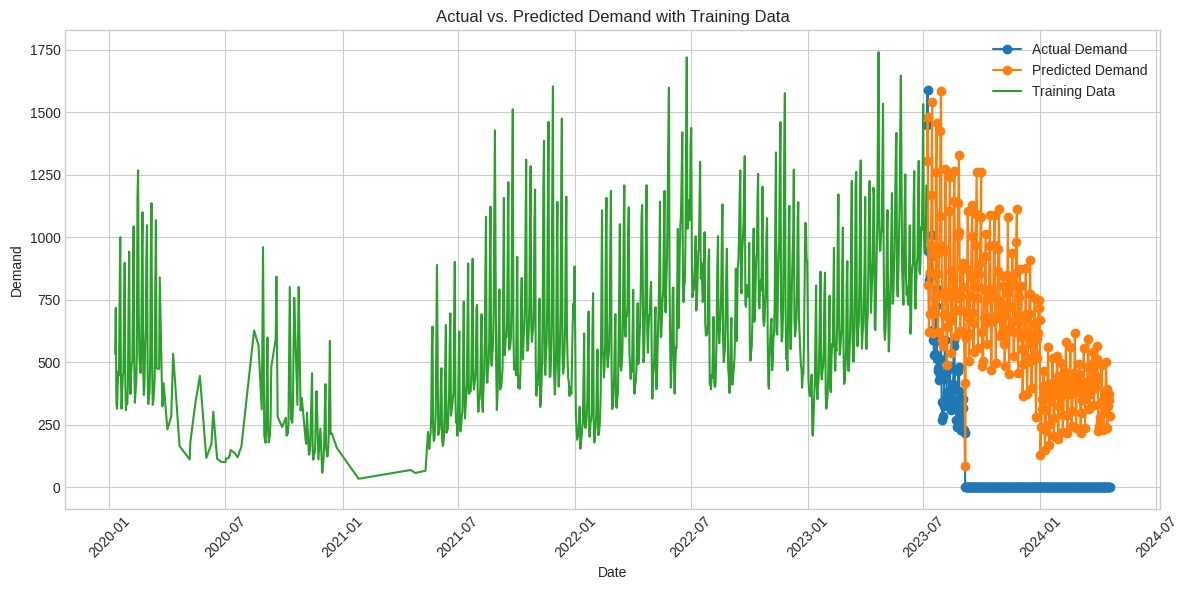

In [29]:
import matplotlib.pyplot as plt

# Set the style for the plot
plt.style.use('seaborn-whitegrid')

# Create a new DataFrame to combine the actual and predicted demand values
plot_data = test_data[['demand', 'predicted_demand']].reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the actual and predicted demand values as lines and data points
plt.plot(plot_data['date'], plot_data['demand'], label='Actual Demand', marker='o')
plt.plot(plot_data['date'], plot_data['predicted_demand'], label='Predicted Demand', marker='o')

# Plot the training data without displaying values
plt.plot(train_data.index, train_data['demand'], label='Training Data', marker=None)

# Set title and axis labels
plt.title('Actual vs. Predicted Demand with Training Data')
plt.xlabel('Date')
plt.ylabel('Demand')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


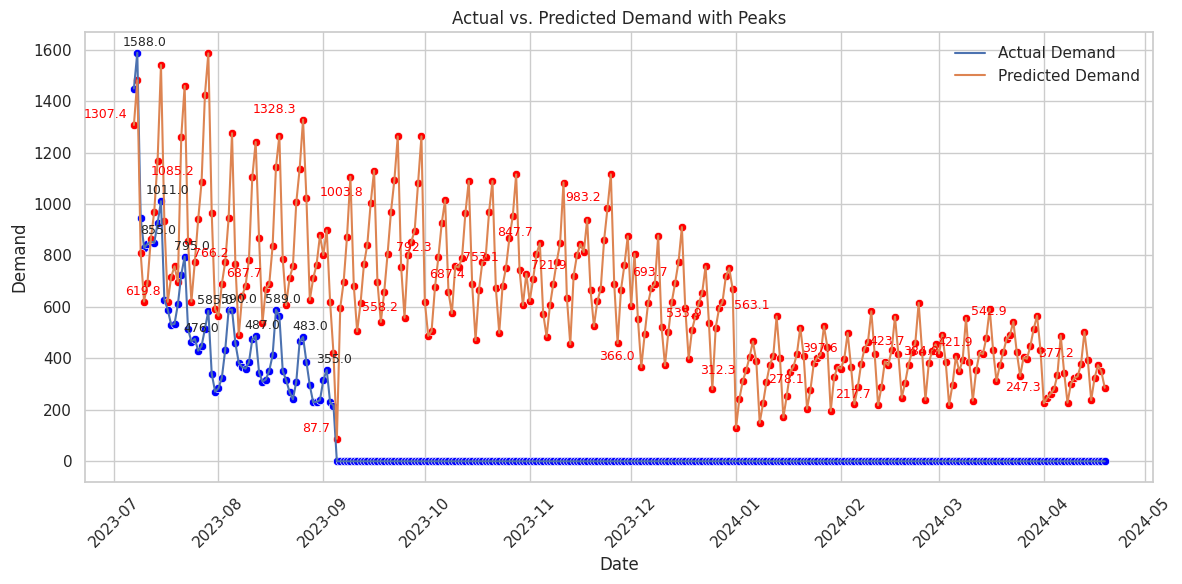

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Set the style for the plot
sns.set(style='whitegrid')

# Create a new DataFrame to combine the actual and predicted demand values
plot_data = test_data[['demand', 'predicted_demand']].reset_index()

# Find the peaks in the 'demand' column
peaks, _ = find_peaks(plot_data['demand'], height=0)  # You can adjust the 'height' parameter if needed

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the actual and predicted demand values as lines and data points
sns.lineplot(x='date', y='demand', data=plot_data, label='Actual Demand')
sns.scatterplot(x='date', y='demand', data=plot_data, color='blue', marker='o')

sns.lineplot(x='date', y='predicted_demand', data=plot_data, label='Predicted Demand')
sns.scatterplot(x='date', y='predicted_demand', data=plot_data, color='red', marker='o')

# Annotate the plot with peak values for actual demand
for peak_idx in peaks:
    peak_date = plot_data['date'].iloc[peak_idx]
    peak_value = plot_data['demand'].iloc[peak_idx]
    plt.annotate(f'{peak_value:.1f}', xy=(peak_date, peak_value), xytext=(5, 5),
                 textcoords='offset points', ha='center', fontsize=9)

# Annotate the plot with predicted values
for idx, row in plot_data.iterrows():
    if idx % 10 == 0:  # Display every 10th prediction to avoid clutter
        pred_date = row['date']
        pred_value = row['predicted_demand']
        plt.annotate(f'{pred_value:.1f}', xy=(pred_date, pred_value), xytext=(-5, 5),
                     textcoords='offset points', ha='right', fontsize=9, color='red')

# Set title and axis labels
plt.title('Actual vs. Predicted Demand with Peaks')
plt.xlabel('Date')
plt.ylabel('Demand')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


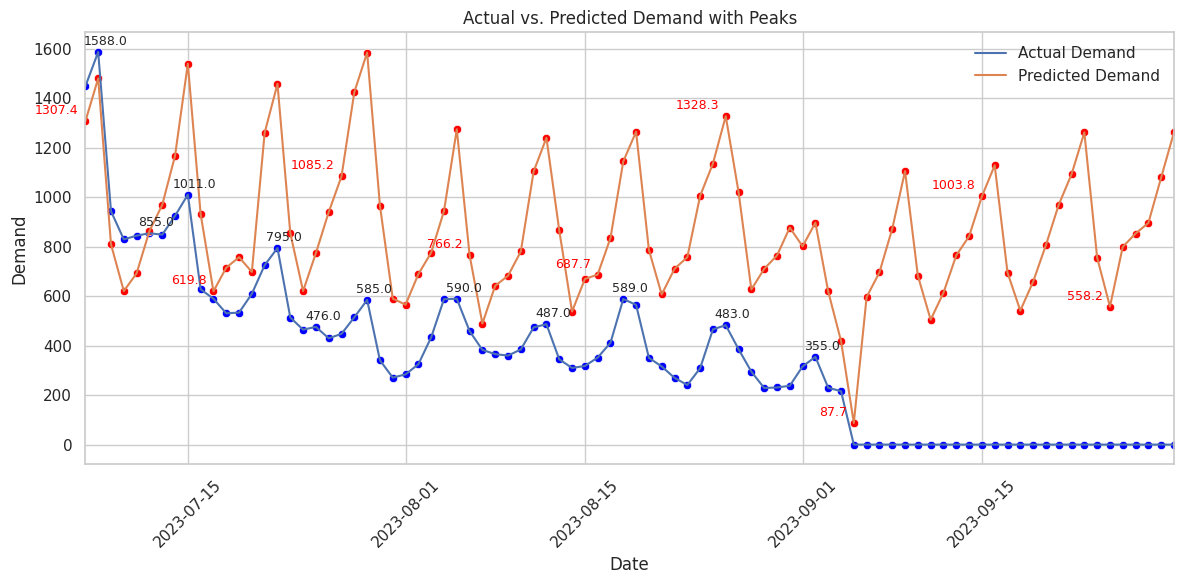

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Set the style for the plot
sns.set(style='whitegrid')

# Create a new DataFrame to combine the actual and predicted demand values
plot_data = test_data[['demand', 'predicted_demand']].reset_index()

# Find the peaks in the 'demand' column
peaks, _ = find_peaks(plot_data['demand'], height=0)  # You can adjust the 'height' parameter if needed

# Filter the plot_data DataFrame to include only data up to the end of September
plot_data_september = plot_data[plot_data['date'] <= '2023-09-30']

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the actual and predicted demand values as lines and data points
sns.lineplot(x='date', y='demand', data=plot_data_september, label='Actual Demand')
sns.scatterplot(x='date', y='demand', data=plot_data_september, color='blue', marker='o')

sns.lineplot(x='date', y='predicted_demand', data=plot_data_september, label='Predicted Demand')
sns.scatterplot(x='date', y='predicted_demand', data=plot_data_september, color='red', marker='o')

# Annotate the plot with peak values for actual demand
for peak_idx in peaks:
    peak_date = plot_data_september['date'].iloc[peak_idx]
    peak_value = plot_data_september['demand'].iloc[peak_idx]
    plt.annotate(f'{peak_value:.1f}', xy=(peak_date, peak_value), xytext=(5, 5),
                 textcoords='offset points', ha='center', fontsize=9)

# Annotate the plot with predicted values
for idx, row in plot_data_september.iterrows():
    if idx % 10 == 0:  # Display every 10th prediction to avoid clutter
        pred_date = row['date']
        pred_value = row['predicted_demand']
        plt.annotate(f'{pred_value:.1f}', xy=(pred_date, pred_value), xytext=(-5, 5),
                     textcoords='offset points', ha='right', fontsize=9, color='red')

# Set title and axis labels
plt.title('Actual vs. Predicted Demand with Peaks')
plt.xlabel('Date')
plt.ylabel('Demand')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to show only up to the end of September
plt.xlim(plot_data_september['date'].min(), plot_data_september['date'].max())

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


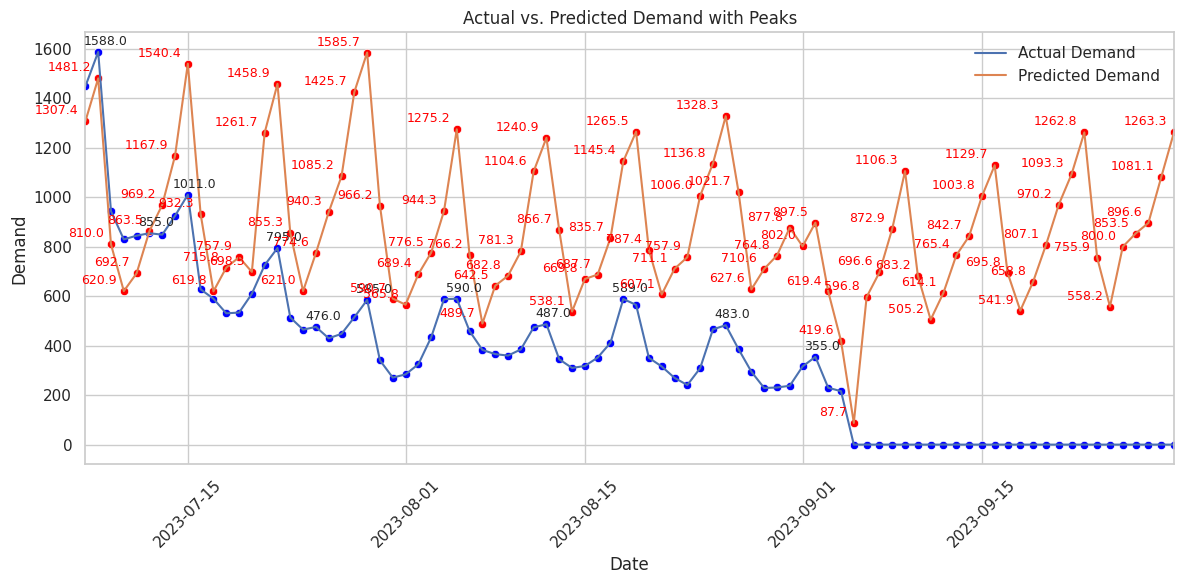

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Set the style for the plot
sns.set(style='whitegrid')

# Create a new DataFrame to combine the actual and predicted demand values
plot_data = test_data[['demand', 'predicted_demand']].reset_index()

# Find the peaks in the 'demand' column
peaks, _ = find_peaks(plot_data['demand'], height=0)  # You can adjust the 'height' parameter if needed

# Filter the plot_data DataFrame to include only data up to the end of September
plot_data_september = plot_data[plot_data['date'] <= '2023-09-30']

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the actual and predicted demand values as lines and data points
sns.lineplot(x='date', y='demand', data=plot_data_september, label='Actual Demand')
sns.scatterplot(x='date', y='demand', data=plot_data_september, color='blue', marker='o')

sns.lineplot(x='date', y='predicted_demand', data=plot_data_september, label='Predicted Demand')
sns.scatterplot(x='date', y='predicted_demand', data=plot_data_september, color='red', marker='o')

# Annotate the plot with peak values for actual demand
for peak_idx in peaks:
    peak_date = plot_data_september['date'].iloc[peak_idx]
    peak_value = plot_data_september['demand'].iloc[peak_idx]
    plt.annotate(f'{peak_value:.1f}', xy=(peak_date, peak_value), xytext=(5, 5),
                 textcoords='offset points', ha='center', fontsize=9)

# Annotate the plot with all predicted values
for idx, row in plot_data_september.iterrows():
    pred_date = row['date']
    pred_value = row['predicted_demand']
    plt.annotate(f'{pred_value:.1f}', xy=(pred_date, pred_value), xytext=(-5, 5),
                 textcoords='offset points', ha='right', fontsize=9, color='red')

# Set title and axis labels
plt.title('Actual vs. Predicted Demand with Peaks')
plt.xlabel('Date')
plt.ylabel('Demand')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to show only up to the end of September
plt.xlim(plot_data_september['date'].min(), plot_data_september['date'].max())

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model on the test dataset
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

9/9 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 336974.677206137
Root Mean Squared Error (RMSE): 580.4951999854409
R-squared (R2): -4.742651355538152


In [34]:
# Save the trained model to a file
model.save('trained_model.h5')


## Hyperparameter Tuning

In [35]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor

# Assuming you have the 'merged_df' DataFrame with the data

# Splitting data into training and testing sets
split_date = '2023-07-06'
train_data = merged_df.loc[merged_df.index <= split_date]
test_data = merged_df.loc[merged_df.index > split_date]

# Extracting input features and target variable for training set
X_train = train_data.drop('demand', axis=1)
y_train = train_data['demand']

# Extracting input features and target variable for testing set
X_test = test_data.drop('demand', axis=1)
y_test = test_data['demand']

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to create the MLP model for KerasRegressor
def create_mlp_model(hidden_units=100, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model using KerasRegressor
mlp_regressor = KerasRegressor(build_fn=create_mlp_model, verbose=0)

# Define hyperparameter grid for Grid Search
param_grid = {
    'hidden_units': [50, 100, 150],  # Number of units in the hidden layer
    'learning_rate': [0.01, 0.001],  # Learning rate
    'epochs': [100, 200, 300]  # Number of training epochs
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_result = grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_hidden_units = grid_search_result.best_params_['hidden_units']
best_learning_rate = grid_search_result.best_params_['learning_rate']
best_epochs = grid_search_result.best_params_['epochs']

print("Best Hidden Units:", best_hidden_units)
print("Best Learning Rate:", best_learning_rate)
print("Best Epochs:", best_epochs)


<ipython-input-35-bbf6c6438d29>:38: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Best Hidden Units: 150
Best Learning Rate: 0.01
Best Epochs: 300


In [36]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go

# Assuming you have the 'merged_df' DataFrame with the data

# Splitting data into training and testing sets
split_date = '2023-07-06'
train_data = merged_df.loc[merged_df.index <= split_date]
test_data = merged_df.loc[merged_df.index > split_date]

# Extracting input features and target variable for training set
X_train = train_data.drop('demand', axis=1)
y_train = train_data['demand']

# Extracting input features and target variable for testing set
X_test = test_data.drop('demand', axis=1)
y_test = test_data['demand']

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to create the MLP model with the best hyperparameters
def create_mlp_model(hidden_units=150, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Create the final MLP model with best hyperparameters
final_mlp_model = create_mlp_model(hidden_units=150, learning_rate=0.01)

# Train the final model on the entire training dataset
final_mlp_model.fit(X_train_scaled, y_train, epochs=300, verbose=0)


In [37]:
# Evaluate the model on the test dataset
y_pred = final_mlp_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


9/9 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 334363.04813109967
Root Mean Squared Error (RMSE): 578.2413407316185
R-squared (R2): -4.698144523831176


In [38]:
# Convert the predicted values to a DataFrame
predictions_df = pd.DataFrame({'Date': test_data.index, 'Predicted_Demand': y_pred.flatten()})

# Export the DataFrame to an Excel file
predictions_df.to_excel('Tuned model predicted_values.xlsx', index=False)


In [39]:
# Visualize actual demand vs. predicted demand
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_data.index, y=y_test, mode='lines', name='Actual Demand'))
fig.add_trace(go.Scatter(x=test_data.index, y=y_pred.flatten(), mode='lines', name='Predicted Demand'))
fig.update_layout(title='Actual vs. Predicted Demand',
                  xaxis_title='Date',
                  yaxis_title='Demand')
fig.show()


In [40]:
# Save the model to a file
final_mlp_model.save('tuned_mlp_model.h5')
